# Big Data Analytics
Praktikum Sommersemester 2023. <small>Version 1.0</small>

# Aufgabe 4: DataFrames 

### Arbeitsanweisung

Bereiten Sie Ihr Wissen über Dataframes mit pandas auf und arbeiten Sie mit dem Datensatz Iris. Platzieren Sie Ihre Lösungen in den vorgegeben Zellen, so dass der darin ausgeführte Code die geforderte Ausgabe produziert. Liefern Sie auch aussagekräftiges Markdown den Aufgaben.

----
Für diese Aufgabe stehen die folgenden Dateien in der JupyterLab-Umgebung zur Verfügung:

* `Big_Data_Analytics_1/datasets/iris/*`<br>Iris-Datensatz

## Aufgabe 4

1. Erarbeiten Sie sich das nötige Wissen zum Einlesen von Daten in einen `pandas Dataframe` (z.B. aus „Python for Data Analysis“ (bzw. der deutschen Ausgabe)).

2. Laden sie den Iris-Datensatz in einen Dataframe und geben Sie grundlegende Statistiken zu den Daten aus (wie geht das einfach mit einem Dataframe?).

3. Visualisieren Sie den Datensatz
    1.  Als Scattermatrix (mittels des python Paketes `matplotlib`)
    2.  Als Boxplots für die einzelnen Spalte des Datensatzes


4. Welche Schlüsse können Sie aus den Daten und deren Visualisierungen hinsichtlich einer möglichen Klassifikation der Daten ziehen?

## 4.2) Iris Datensatz in Dataframe geladen und Ausgabe grundlegender Statistiken

In [1]:
# Aufgabe 4 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../Big_Data_Analytics_1/datasets/iris/data.all', sep='\s+', header=None)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
#print(data.head())

data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4.3.1) Datensatz als Scattermatrix visualisieren

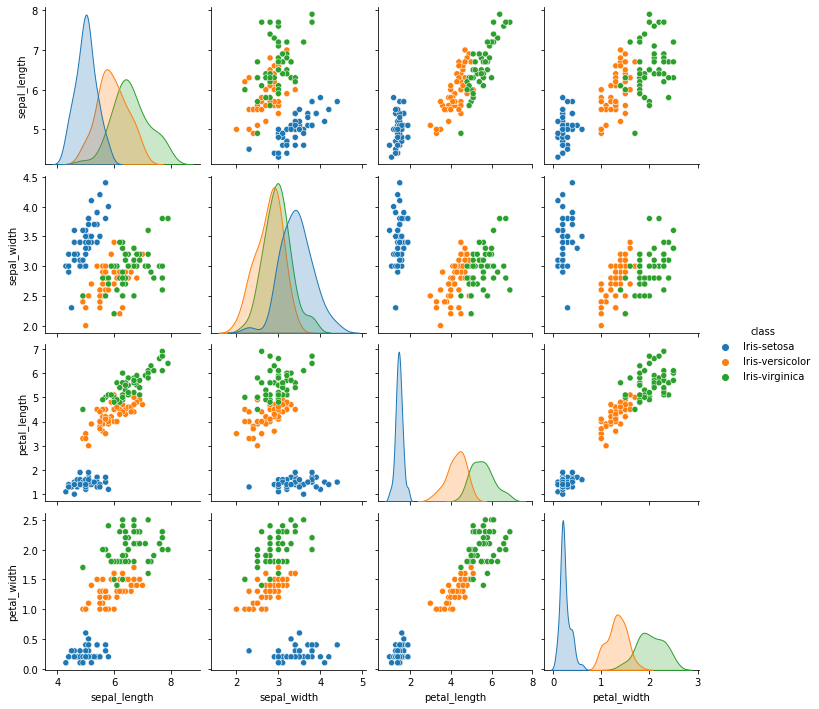

In [2]:
# Aufgabe 4 3A
# Scattermatrix
sns.pairplot(data, hue='class')
plt.show()

## 4.3.2) Datensatz als Boxplot visualisieren

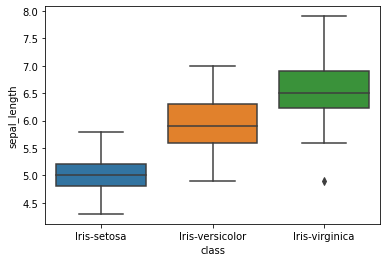

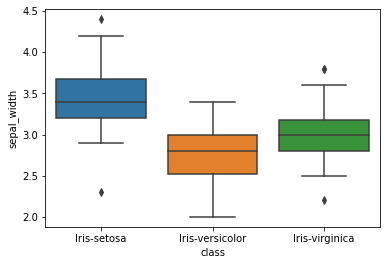

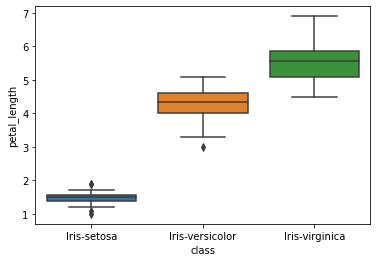

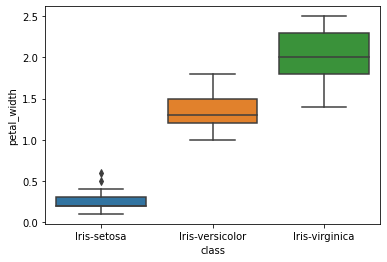

In [3]:
# Aufgabe 4 3B
# Boxplots
#data.boxplot(by='class', figsize=(12,6))

for column in data.columns[:-1]:
    sns.boxplot(x='class', y=column, data=data)
    plt.show()


## 4.4 Schlüsse einer möglichen Klassifikation der Daten
- In der Scatter Matrix wird ersichtlich, dass die petal length und die petal width der Iris Setosa deutlich größer im Vergleich zu den anderen beiden Iris-Arten ist. Das deutet daraufhin, dass die petal_length ein starkes Unterscheidungsmerkmal für die Iris Setosa sein könnte.
- Im Boxplot weist die Iris Setosa in fast allen Merkmalen Ausreißer auf, außer in der sepal length. Ausreißer können zu Fehlklassifikationen führen, wenn sie nicht korrekt behandelt werden.
- Im Boxplot ist ebenfalls zu erkennen, dass der Interquartilsabstand(IQR) der Iris-Setosa bei den Petal-Werten sehr klein ist im Gegensatz zu den anderen beiden Iris-Arten. Das beduetet die Datenpunkte liegen dort mehr im Median. Das könnte dazu beitragen, die iris Setosa dort von den anderen Arten zu unterscheiden.
- Merkmale mit hoher Korrelation könnten redundant sein, da sie ähnliche Informationen tragen.
- In unserem Fall weisen petal_length und petal_width mit 0.96 eine stark positive Korrelation auf. Das deutet darauf hin, dass ein Merkmal möglicherweise entfernt werden könnte, ohne dass dabei wesentliche Informationen verloren gehen. Allerdings hängt die engültige entscheidung darüber von dem verwendeten Modell ab.

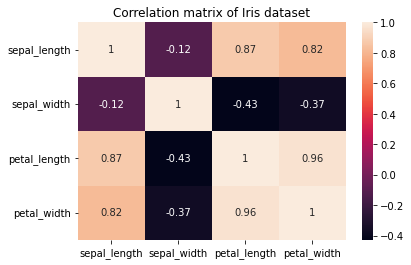

In [4]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix of Iris dataset')
plt.show()